## Conceptual 

### 1. 

When there is large "gap" between the two distributions of the X values, it poses a problem for the Logistic Regression classifier. This is a problem because when the there is no overlap in the X values, the parameter estimates for the logistic regresion model are very unstable. Logistic regression involves using the maximum likelihood method to estimate the parameters and when there is a separation in the two distributions of the X values, the MLE does not exist and this poses the problem to Logistic Regression. Linear Discriminant Analysis (LDA) does not suffer with this limitation as it involves modeling X separately in each class and then using the Bayes theorem to flip around the estimates for Pr(Y = x| X = x). 

### 2. 

- Logistic Regression: 

Logistic Regression is a supervised, parametric model that assumes the following function: $p(X) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$. Logistic regression models the probaility that Y belongs to a particular category and it has high bias and low variance. 


- LDA: 

Linear Discriminant Analysis is an unsupervised paramteric model that models the distribution of X separately for each category of Y. It obtains the probability distribution of X given a value of Y and then uses Bayes Theorem arrive at the desired probability. The functional form and approximation of the Bayes Theorem is $\text{P(Y = K | X = X)} = \frac{\pi_kf_k(x)}{\sum^k_{l=1}\pi_lf_l(x)}$. 

- kNN: 

kNN algorithm is an unsupervised, non-parametric model that predicts what group of Y a new observation belongs by considering the k nearest neighbors. The algorithm to find the neighbors is to choose k, find the distance between a value of X and all observations in the data set, choose the k smallest distance and determine the class the observation belongs to by majority vote. For kNN classification, the variance of the classifier depends on the chosen value of k. As k grows, the model gets becomes less flexible and has a lot of bias. Whereas, for small values of k, the model has more flexibility and variance with a lower bias. Thus, in kNN algorithm, k determines the bias-variance trade-off. 


### 3. 

Dimensionality is defined as the ratio of observations (n) to predictor variables (p) i.e., $\frac{p}{n}$. The biggest limitation of kNN arises when p approaches n i.e., when p gets larger than n. The curse of dimensionality is that kNN regression fails when the dimensionality of the problem gets too high. In other words, when p is large, it results in a phenonmenon when a given observation has no nearby neighbors and this is called the curse of dimensionality. The reason why kNN fails in high dimensional contexts is because the k observations nearest to the given test observation $x_0$ may be very far away when p is large and this leads to a poor prediction $f(x_0)$ and poor kNN fit. 

### 4. 

In the case where we use 1-nearest neighbors (i.e. K = 1), we have an error rate of 0% on the training data and thus with an average of 18%, this makes the error rate of the training data $18 \text{ x } 2 = 36 \text{%}$. Since this error data is greater than the 30% training error data from the logistic regression, we prefer the logisitc regression method for classification of new observations. 


## Applied

### Ex 4.10

### (a)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


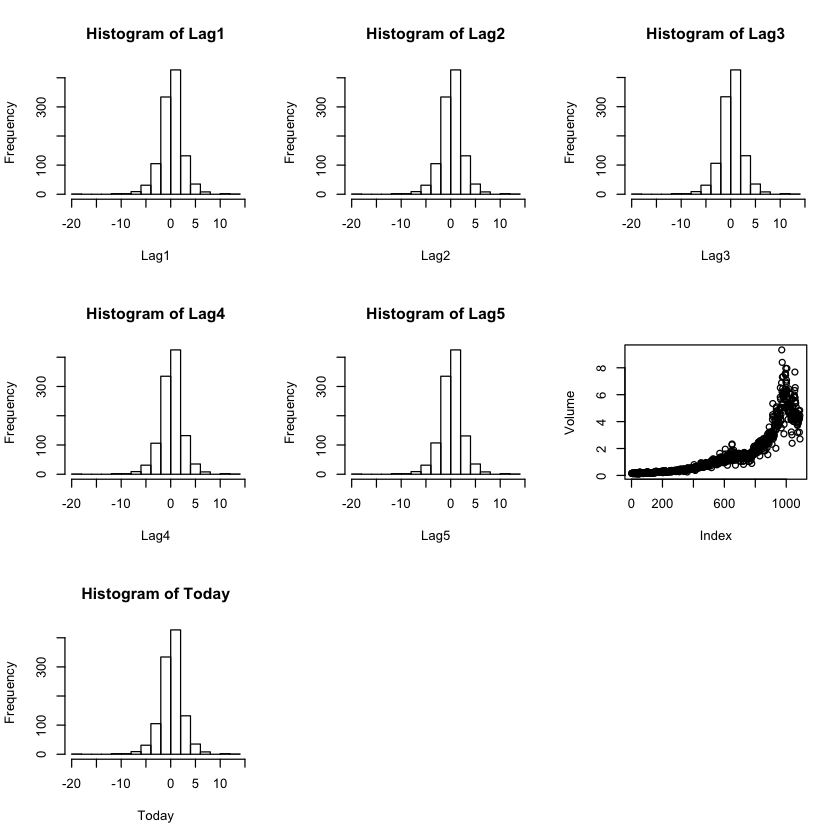

In [4]:
library(ISLR)
attach(Weekly)

summary(Weekly)

par(mfrow = c(3,3))
hist(Lag1)
hist(Lag2)
hist(Lag3)
hist(Lag4)
hist(Lag5)
plot(Volume)
hist(Today)

cor(Weekly[-9])

We notice that there is a strong positive correlation between Year and Volume.  

### (b)

In [5]:
glm.fit = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, family = "binomial")
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial", data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


The only predictor that seems to be statistically significant is Lag2 with a p-value of approximately 0.03. 

### (c)

In [10]:
glm.probs = predict(glm.fit, type = "response")
glm.pred = rep("Down", length(glm.probs)) 
glm.pred[glm.probs > 0.5] = "Up" 
table(glm.pred, Direction)

round((54 + 557)/nrow(Weekly)* 100,3) # number of correct predictions 

        Direction
glm.pred Down  Up
    Down   54  48
    Up    430 557

[1] 56.107

The confusion table indicates that the percentage of correct predictions is 56.107%, thus the training data error rate is 43.893%. In other words, we are 56.107% correct in estimating whether the market will go up or down on a given day.  

### (d)

In [12]:
train = (Year < 2009)
Weekly.2008 = Weekly[!train,]
Direction.2008 = Direction[!train]
glm.fit.1 = glm(Direction ~ Lag2, data = Weekly, family = "binomial", subset = train) 

glm.probs.1 = predict(glm.fit.1, Weekly.2008, type = "response")
glm.pred.1 = rep("Down", length(glm.probs.1))
glm.pred.1[glm.probs.1 > 0.5] = "Up"
table(glm.pred.1, Direction.2008)

round((9 + 56)/nrow(Weekly.2008)* 100,3)

          Direction.2008
glm.pred.1 Down Up
      Down    9  5
      Up     34 56

[1] 62.5

The confusion table indicates that we are 62.5% correct in estimating whether the market will go up or down on a given day. Thus, the training error rate is 37.5%.

### (e)

In [14]:
library(MASS)
lda.fit = lda(Direction ~ Lag2, data = Weekly, subset = train)
lda.fit

lda.pred = predict(lda.fit, Weekly.2008)
lda.class = lda.pred$class
table(lda.class, Direction.2008)
round(mean(lda.class == Direction.2008),3) # fraction of correct prediction

Call:
lda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

         Direction.2008
lda.class Down Up
     Down    9  5
     Up     34 56

[1] 0.625

The overall fraction of the correct predictions for the held out data is 62.5% and the training error rate is 37.5%. 

### (f)

In [15]:
qda.fit = qda(Direction ~ Lag2, data = Weekly, subset = train)
qda.fit

qda.class = predict(qda.fit, Weekly.2008)$class
table(qda.class, Direction.2008)

round(mean(qda.class == Direction.2008),3)

Call:
qda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

         Direction.2008
qda.class Down Up
     Down    0  0
     Up     43 61

[1] 0.587

The overall fraction of the correct predictions for the held out data is 58.7%, thus the training error rate is 41.3%. 


### (g)

In [16]:
library(class)

train.X = as.matrix(Lag2[train])
test.X = as.matrix(Lag2[!train])
train.Direction = Direction[train]

knn.pred = knn(train.X, test.X, train.Direction, k = 1)
table(knn.pred, Direction.2008)


round(mean(knn.pred == Direction.2008),3)

        Direction.2008
knn.pred Down Up
    Down   21 30
    Up     22 31

[1] 0.5

The overall fraction of the correct predictions for the held out data is 50%, and the training error rate is 50% for kNN.

### (h)

From the above analysis we notice that Logistic Regression and LDA have the smallest error rate of 37.5%, this is followed by QDA and then kNN, which has the largest error rate. 

### (i)

In [33]:
# Including interaction term in Model 

qda.fit.test = qda(Direction ~ Lag2*Lag1, data = Weekly, subset = train)

qda.class.test = predict(qda.fit.test, Weekly.2008)$class
table(qda.class.test, Direction.2008)
1 - round(mean(qda.class.test == Direction.2008),3)

lda.fit.test = lda(Direction ~ Lag2*Lag1, data = Weekly, subset = train)

lda.class.test = predict(lda.fit.test, Weekly.2008)$class
table(lda.class.test, Direction.2008)
1 - round(mean(lda.class.test == Direction.2008),3) # training data error rate 

glm.fit.test = glm(Direction ~ Lag2*Lag1, data = Weekly, family = "binomial", subset = train) 

glm.probs.test = predict(glm.fit.test, Weekly.2008, type = "response")
glm.pred.test = rep("Down", length(glm.probs.test))
glm.pred.test[glm.probs.test > 0.5] = "Up"
table(glm.pred.test, Direction.2008)

1 - round(mean(glm.pred.test == Direction.2008),3)

              Direction.2008
qda.class.test Down Up
          Down   23 36
          Up     20 25

[1] 0.538

              Direction.2008
lda.class.test Down Up
          Down    7  8
          Up     36 53

[1] 0.423

             Direction.2008
glm.pred.test Down Up
         Down    7  8
         Up     36 53

[1] 0.423

In [26]:
# testing with different values of k 
knn.pred.10 = knn(train.X, test.X, train.Direction, k = 10)
knn.pred.50 = knn(train.X, test.X, train.Direction, k = 50)
knn.pred.100 = knn(train.X, test.X, train.Direction, k = 200)

1 - round(mean(knn.pred.10 == Direction.2008),3) 
1 - round(mean(knn.pred.50 == Direction.2008),3)
1 - round(mean(knn.pred.100 == Direction.2008),3)

[1] 0.423

[1] 0.433

[1] 0.385

Upon adding interaction terms, we notice that the error rates were worse than our original model. Additionally, while testing the kNN classifier, we notice that for larger values of k the training error rate reduces, with k = 200 having the best error rate of 38.5%. 

## Ex. 4.11

### (a)

In [35]:
attach(Auto)

Auto$mpg01 = ifelse(mpg > median(mpg), 1 , 0)

### (b)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


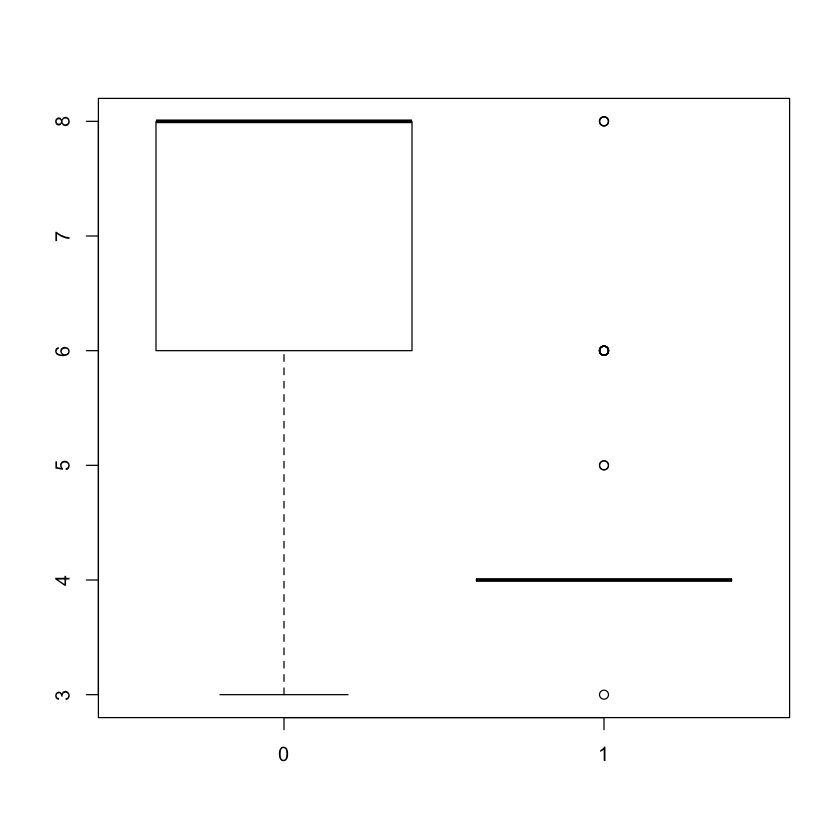

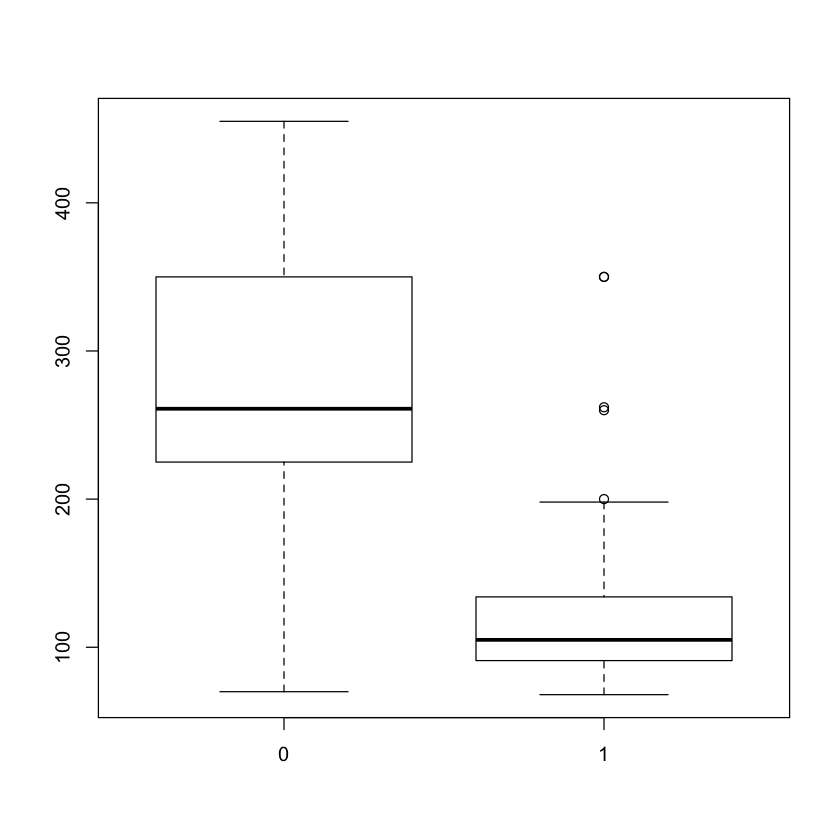

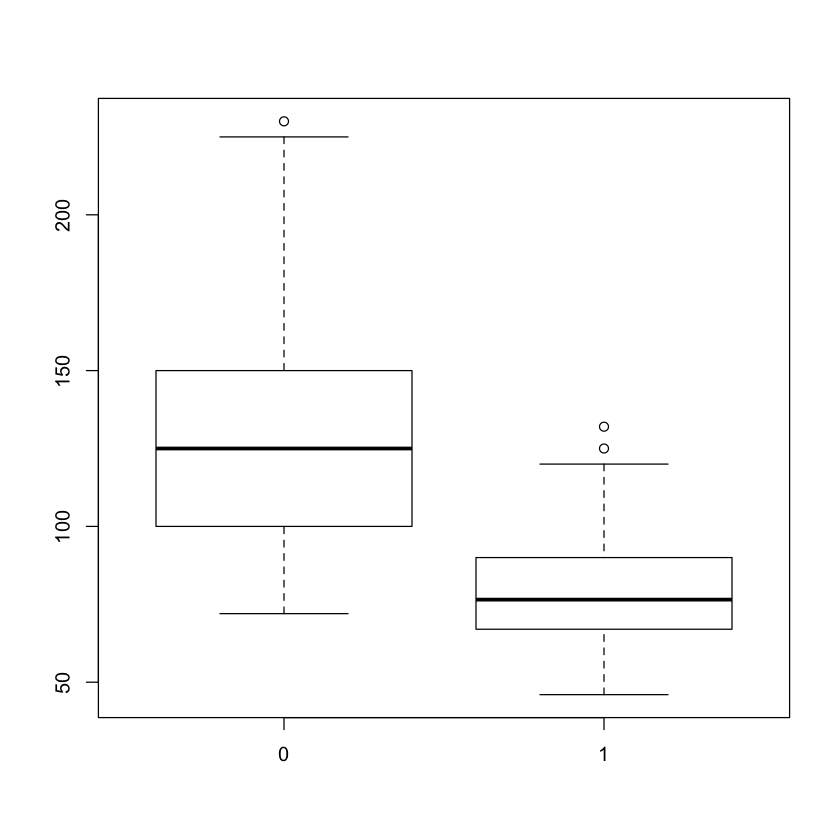

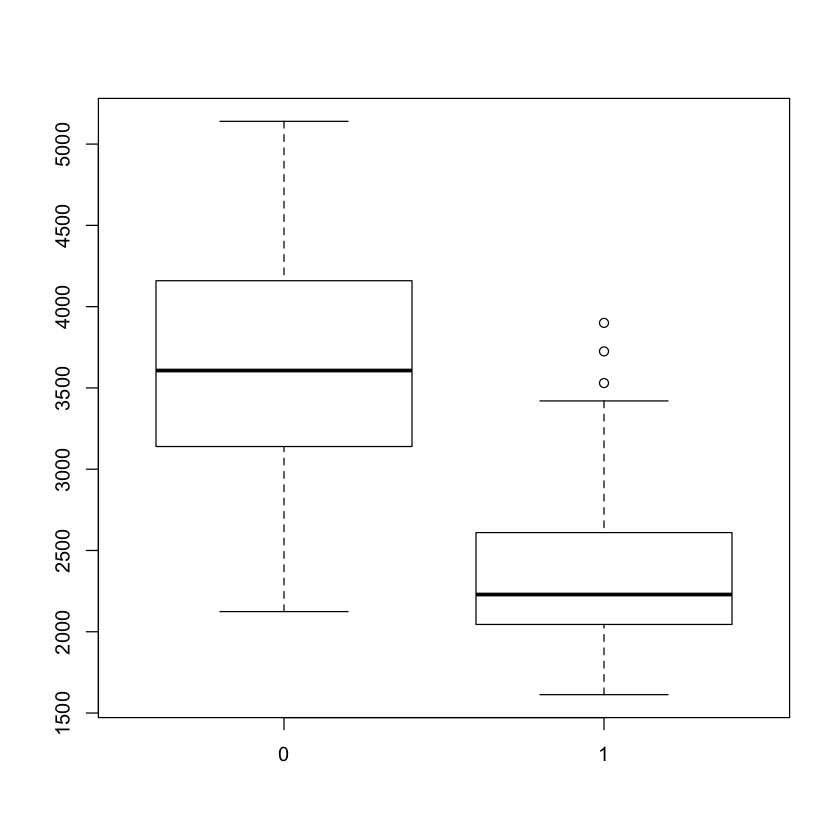

In [36]:
cor(Auto[-9])
boxplot(cylinders ~ mpg01, data = Auto)
boxplot(displacement ~ mpg01, data = Auto)
boxplot(horsepower ~ mpg01, data = Auto)
boxplot(weight ~ mpg01, data = Auto)

Based on the correlations and the boxplots we notice that mpg01 seems to have a strong negative correlation with cylinders, displacement, horsepower and weight. 

### (c)

In [13]:
mpg01 = Auto$mpg01
train = year < 76
Auto.train = Auto[train,]
Auto.test = Auto[!train,]
mpg01.test = mpg01[!train]

### (d)

In [14]:
lda.fit.1 = lda(mpg01 ~ cylinders + displacement + horsepower + weight, data = Weekly, subset = train)
lda.fit.1

lda.pred.1 = predict(lda.fit.1, Auto.test)
lda.class.1 = lda.pred.1$class
table(lda.class.1, mpg01.test)

mean(lda.class.1 != mpg01.test)*100

Call:
lda(mpg01 ~ cylinders + displacement + horsepower + weight, data = Weekly, 
    subset = train)

Prior probabilities of groups:
        0         1 
0.6777778 0.3222222 

Group means:
  cylinders displacement horsepower   weight
0  6.852459     285.8607  136.22131 3671.746
1  4.034483     104.3707   79.72414 2228.172

Coefficients of linear discriminants:
                       LD1
cylinders    -0.3810303552
displacement -0.0074765653
horsepower    0.0157299449
weight       -0.0006540381

           mpg01.test
lda.class.1   0   1
          0  66  15
          1   8 123

[1] 10.84906

The test error rate of the model is 10.85%. 
### (e)

In [15]:
qda.fit.1 = qda(mpg01 ~ cylinders + displacement + horsepower + weight, data = Weekly, subset = train)
qda.fit.1

qda.class.1 = predict(qda.fit.1, Auto.test)$class
table(qda.class.1, mpg01.test)

mean(qda.class.1 != mpg01.test)*100

Call:
qda(mpg01 ~ cylinders + displacement + horsepower + weight, data = Weekly, 
    subset = train)

Prior probabilities of groups:
        0         1 
0.6777778 0.3222222 

Group means:
  cylinders displacement horsepower   weight
0  6.852459     285.8607  136.22131 3671.746
1  4.034483     104.3707   79.72414 2228.172

           mpg01.test
qda.class.1   0   1
          0  70  21
          1   4 117

[1] 11.79245

The test error rate of the model is 11.79%.

### (f)

In [16]:
glm.fit.1 = glm(mpg01 ~ cylinders + displacement + horsepower + weight, data = Weekly, subset = train)
summary(glm.fit.1)

glm.probs.1 = predict(glm.fit.1, Auto.test, type = "response")
glm.pred.1 = rep(0, length(glm.probs.1)) 
glm.pred.1[glm.probs.1 > 0.5] = 1 
table(glm.pred.1, mpg01.test)

mean(glm.pred.1 != mpg01.test)*100


Call:
glm(formula = mpg01 ~ cylinders + displacement + horsepower + 
    weight, data = Weekly, subset = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.91793  -0.17157   0.06845   0.24805   0.66980  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.299e+00  1.540e-01   8.432 1.22e-14 ***
cylinders    -8.846e-02  4.439e-02  -1.993  0.04783 *  
displacement -1.736e-03  8.736e-04  -1.987  0.04849 *  
horsepower    3.652e-03  1.235e-03   2.956  0.00354 ** 
weight       -1.518e-04  6.773e-05  -2.242  0.02622 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.0949826)

    Null deviance: 39.311  on 179  degrees of freedom
Residual deviance: 16.622  on 175  degrees of freedom
AIC: 94.016

Number of Fisher Scoring iterations: 2


          mpg01.test
glm.pred.1   0   1
         0  66  15
         1   8 123

[1] 10.84906

The test error rate of the model is 10.85%. 

### (g)

In [17]:
train.X = cbind(cylinders, displacement, horsepower, weight)[train,]
test.X = cbind(cylinders, displacement, horsepower, weight)[!train,]

train.mpg01 = mpg01.test[train] 
set.seed(1)
knn.pred.1 = knn(train.X, test.X, train.mpg01, k = 1)
table(knn.pred.1, mpg01.test)
mean(knn.pred.1 != mpg01.test)*100

knn.pred.10 = knn(train.X, test.X, train.mpg01, k = 10)
table(knn.pred.10, mpg01.test)
mean(knn.pred.10 != mpg01.test)*100

knn.pred.100 = knn(train.X, test.X, train.mpg01, k = 50)
table(knn.pred.100, mpg01.test)
mean(knn.pred.100 != mpg01.test)*100

          mpg01.test
knn.pred.1   0   1
         0  19  20
         1  55 118

[1] 35.37736

           mpg01.test
knn.pred.10   0   1
          0  14  29
          1  60 109

[1] 41.98113

            mpg01.test
knn.pred.100   0   1
           0   5   0
           1  69 138

[1] 32.54717

Based on our output above, we notice that the value of k = 100 seems to have the smallest test error rate of 32.55% and thus seems to perform the best.